### Import Libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [4]:
from scipy.stats import chi2_contingency, iqr
import stat


In [70]:
## Get the data

udata = pd.read_csv('udemy_data.csv')

In [71]:
udata.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,Date,Free/Paid
0,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,268923,8629,45,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development,2013-02-14,Free
1,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0,161029,279,27,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development,2013-06-09,Free
2,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,121584,27445,342,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development,2015-11-02,Paid
3,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0,120291,5924,30,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Web Development,2014-04-08,Free
4,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512,22412,304,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Web Development,2016-03-08,Paid


In [72]:
udata.isnull().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
rating                 0
content_duration       0
published_timestamp    0
subject                0
Date                   0
Free/Paid              0
dtype: int64

In [73]:
udata.shape

(3676, 14)

In [74]:
udata.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,rating,content_duration
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,6.757535e+05,66.115343,3199.260881,156.309848,40.129761,0.610868,4.096137
std,3.431304e+05,61.056073,9486.582966,935.674518,50.398507,0.334287,6.054948
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.074740e+05,20.000000,112.000000,4.000000,15.000000,0.280000,1.000000
50%,6.876920e+05,45.000000,912.500000,18.000000,25.000000,0.760000,2.000000
75%,9.608140e+05,95.000000,2558.000000,67.000000,46.000000,0.930000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,1.000000,78.500000


In [75]:
udata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   int64  
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   int64  
 4   num_subscribers      3676 non-null   int64  
 5   num_reviews          3676 non-null   int64  
 6   num_lectures         3676 non-null   int64  
 7   level                3676 non-null   object 
 8   rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3676 non-null   object 
 12  Date                 3676 non-null   object 
 13  Free/Paid            3676 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 402.2+ KB


In [76]:
## Lets drop unnecessary columns
udata.drop(['url','published_timestamp'], axis=1, inplace=True)

In [77]:
udata.drop(['course_id',], axis=1, inplace=True)

In [78]:
udata.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,subject,Date,Free/Paid
0,Learn HTML5 Programming From Scratch,0,268923,8629,45,Beginner Level,0.82,10.5,Web Development,2013-02-14,Free
1,Coding for Entrepreneurs Basic,0,161029,279,27,Expert Level,0.69,3.5,Web Development,2013-06-09,Free
2,The Web Developer Bootcamp,200,121584,27445,342,Beginner Level,0.89,43.0,Web Development,2015-11-02,Paid
3,Build Your First Website in 1 Week with HTML5 ...,0,120291,5924,30,All Levels,0.78,3.0,Web Development,2014-04-08,Free
4,The Complete Web Developer Course 2.0,200,114512,22412,304,Beginner Level,0.55,30.5,Web Development,2016-03-08,Paid


In [80]:
# Create  list of categorical variables
category =[]
for c in udata.columns:
    if udata[c].dtypes in ['object']:
        category.append(c)

In [81]:
category

['course_title', 'level', 'subject', 'Date', 'Free/Paid']

In [82]:
# categorical variables value counts
for i in udata[category]:
    print("\n****************************************")
    print(udata[i].value_counts())


****************************************
Creating an animated greeting card via Google Slides            3
Acoustic Blues Guitar Lessons                                   3
How to Make a Wordpress Website 2017                            2
Drum Lessons For Beginners                                      2
Practical CSS Website Development: Crash Course                 2
                                                               ..
CurrencyFair - Avoid Bank Charges when converting currencies    1
Learn By Example: The Foundations of HTML, CSS & Javascript     1
Learn PHP Object Oriented Features with Simple Examples         1
ReactJS and Flux: Learn By Building 10 Projects                 1
The Cash Flow Statement - An Introduction                       1
Name: course_title, Length: 3663, dtype: int64

****************************************
All Levels            1925
Beginner Level        1271
Intermediate Level     422
Expert Level            58
Name: level, dtype: int64

********

In [83]:
#table for the categorical variables
udata.loc[:,category]

,course_title,level,subject,Date,Free/Paid
0,Learn HTML5 Programming From Scratch,Beginner Level,Web Development,2013-02-14,Free
1,Coding for Entrepreneurs Basic,Expert Level,Web Development,2013-06-09,Free
2,The Web Developer Bootcamp,Beginner Level,Web Development,2015-11-02,Paid
3,Build Your First Website in 1 Week with HTML5 ...,All Levels,Web Development,2014-04-08,Free
4,The Complete Web Developer Course 2.0,Beginner Level,Web Development,2016-03-08,Paid
...,...,...,...,...,...
3671,Foundations of Investing,Beginner Level,Business Finance,2016-07-27,Paid
3672,60 Minutes to Fundamental Accounting Skills,All Levels,Business Finance,2017-06-28,Paid
3673,Teeter-Totter Accounting,Intermediate Level,Business Finance,2017-02-08,Paid
3674,Financial Statement Auditing Cycles,All Levels,Business Finance,2017-06-29,Paid


In [53]:
import colorama
from colorama import Fore

### Statistical Testing using Chisquare:

course_title:


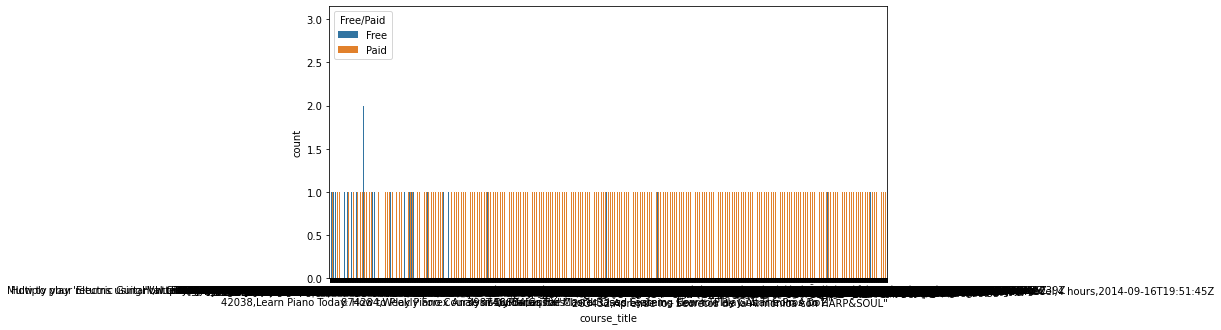

 'course_title'is a 'bad Predictor'
p_val=0.47179417814197666

level:


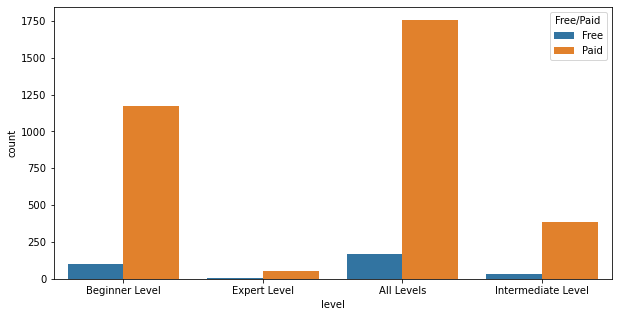

 'level'is a 'bad Predictor'
p_val=0.610746830612338

subject:


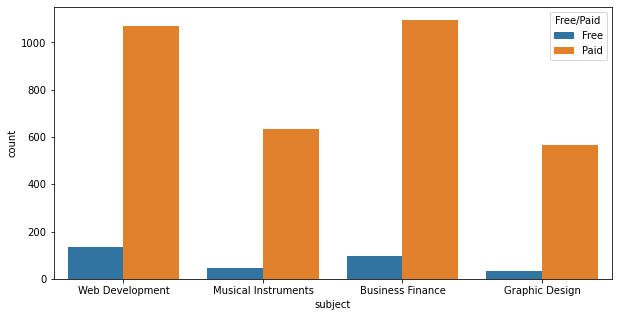

 'subject' is a Good Predictor
p_val=0.00023048437912173768

Date:


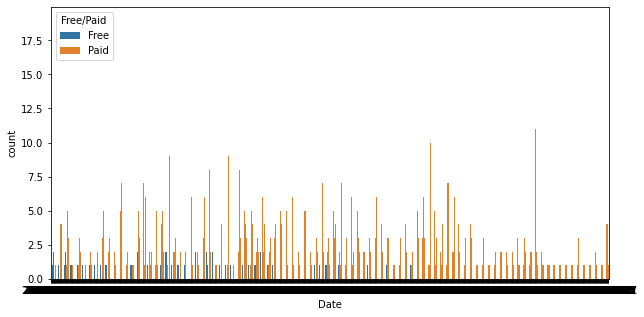

 'Date' is a Good Predictor
p_val=0.003973861453825623

Free/Paid:


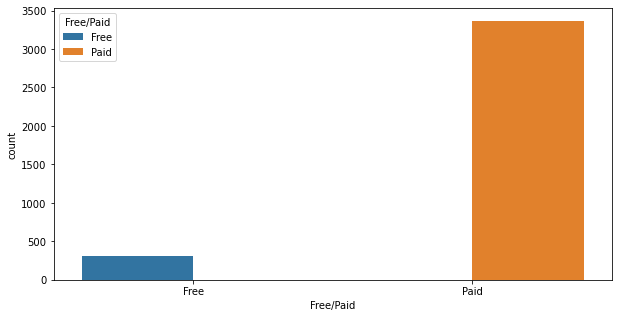

 'Free/Paid' is a Good Predictor
p_val=0.0



In [87]:
for i in category:
    print(i+":")
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,data=udata,hue='Free/Paid')
    plt.show()
    
    a=np.array(pd.crosstab(udata['Free/Paid'],udata[i]))
    (stats,p,dof,_) = chi2_contingency(a,correction=False)
    
    if p>0.05:
        print(Fore.RED + " '{}'is a 'bad Predictor'".format(i))
        print('p_val={}\n'.format(p))
        
    else:
        print(Fore.GREEN + " '{}' is a Good Predictor".format(i))
        print('p_val={}\n'.format(p))

In [88]:
# Course title and level are bad predictors so we can drop them
udata.drop(['course_title','level'],axis=1,inplace=True)

In [89]:
## Continous variables

column_name = udata.columns.tolist()

continuous = list(set(column_name)-set(category)) 

In [90]:
continuous

['rating',
 'num_reviews',
 'content_duration',
 'price',
 'num_subscribers',
 'num_lectures']

In [91]:
udata.loc[:,continuous]

,rating,num_reviews,content_duration,price,num_subscribers,num_lectures
0,0.82,8629,10.5,0,268923,45
1,0.69,279,3.5,0,161029,27
2,0.89,27445,43.0,200,121584,342
3,0.78,5924,3.0,0,120291,30
4,0.55,22412,30.5,200,114512,304
...,...,...,...,...,...,...
3671,0.95,0,2.0,40,0,18
3672,0.95,0,2.5,75,0,9
3673,0.36,0,1.0,90,0,12
3674,0.15,0,2.0,50,0,9


rating:


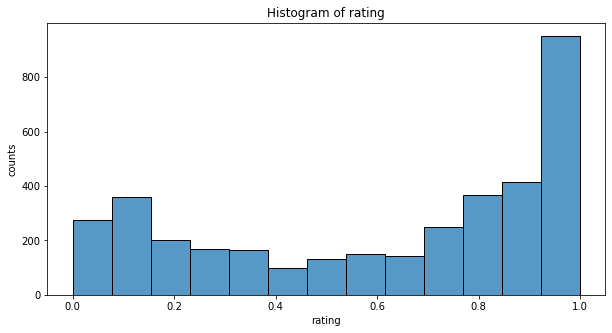

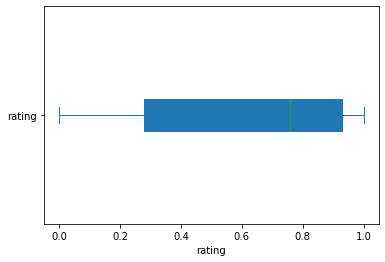

num_reviews:


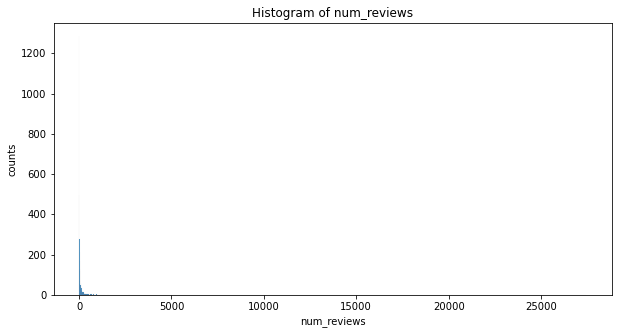

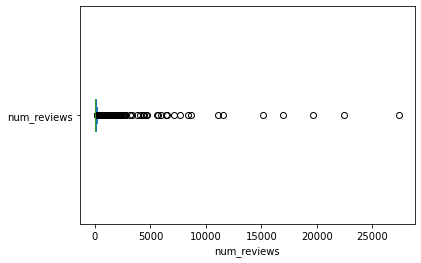

content_duration:


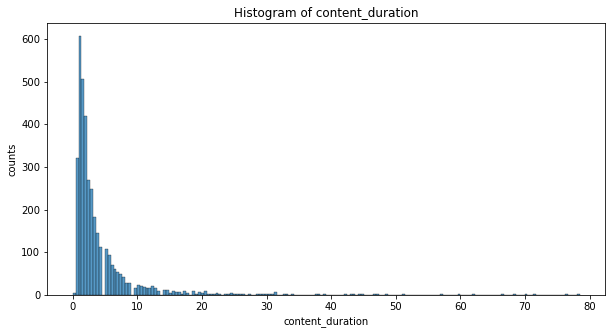

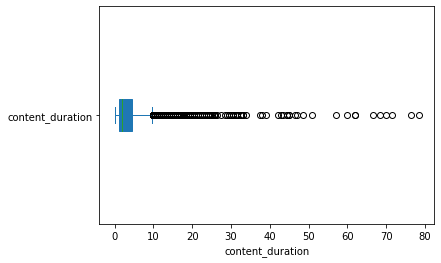

price:


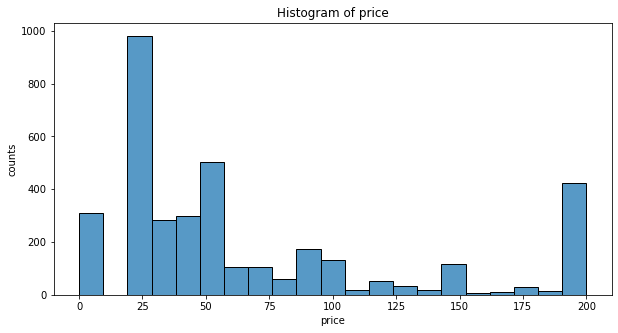

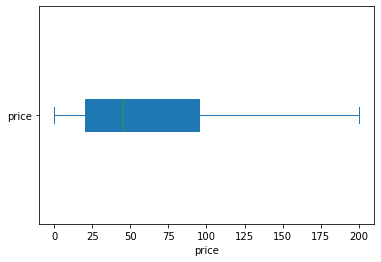

num_subscribers:


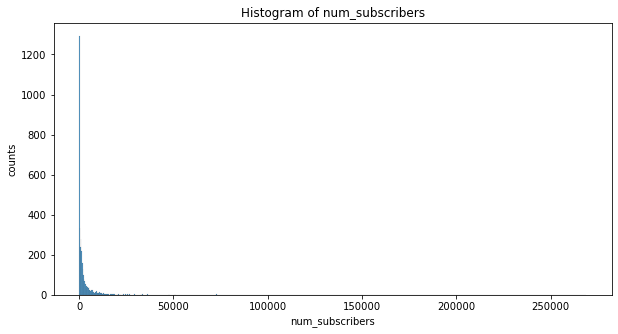

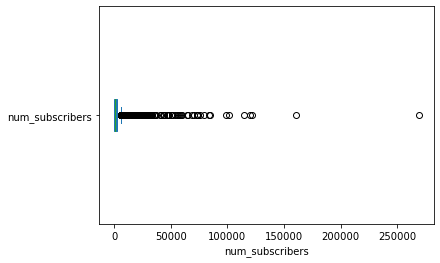

num_lectures:


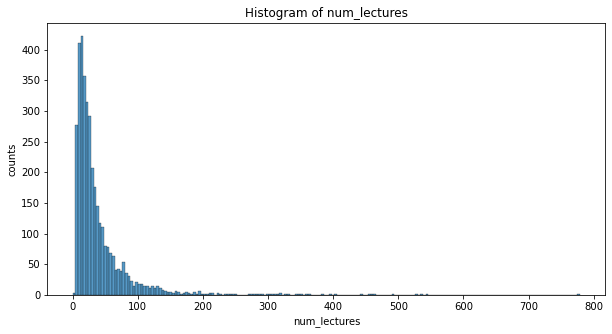

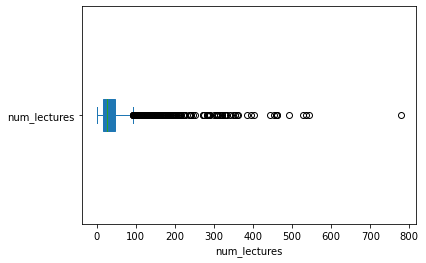

In [92]:
# visualize the continuous data

for i in continuous:
    print(i+":")
    plt.figure(figsize=(10,5))
    sns.histplot(udata[i])
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.title('Histogram of ' + i)
    plt.show()
    udata[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

## Treating Outliers:

In [65]:
iqr = iqr

In [ ]:
for i in continuous:
    print(i+":")
    plt.figure(figsize=(20,10))
    udata[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()
    
    iqr = udata[i].describe()['75%']-udata[i].describe()['25%']
    right_lim = udata[i].quantile(0.75)+1.5*iqr
    left_lim = udata[i].quantile(0.25)-1.5*iqr
    print('Left Limit:{}'.format(left_lim))
    print('Right Limit:{}'.format(right_lim))
    print('iqr:{}'.format(iqr))
    
    a=input("if left outlier type 'left' else 'right' else 'both' if no outliers then type:" )
    a=a.lower()
    
    if a=='left':
        lo = float(input('by what number do you want to replace'))
        udata[i]=[lo if val<left_lim else val for val in udata[i]]
    elif a=='right':
        ro=float(input('by what number do you want to replace'))
        udata[i]=[ro if val>right_lim else val for val in udata[i]]
    elif a=='both':
        lo = float(input('by what number do you want to replace'))
        
        ro=float(input('by what number do you want to replace'))
        udata[i]=[lo if val<left_lim else val for val in udata[i]]
        udata[i]=[ro if val>right_lim else val for val in udata[i]]
        
    elif a =='no':
        pass
    plt.figure(figsize=(20,10))
    udata[i].plot.box(vert=False, patch_artist=True)
    plt.xlabel(i)
    plt.show()